# Exploring Professor Chris Brooks' Strava data in Summer 2019

In this notebook, I will be attempting to make sense of the Strava data collected from Professor Chris Brooks exercise routine in the summer of 2019. I will split the assignment into the following section: retrieving and cleaning dataset, utilizing visual analysis techniques to make sense of data, and finally providing a conclusion based on the visualizations to Professor Brooks' activities.

## Importing the data

In [1]:
# import the required dependencies
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('strava.csv')
df.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:03,0.0,300.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,activities/2675855419.fit.gz,...,0.000,0.0,68.0,NaN,NaN,0.0,2019-07-08 21:04:04,0.0,300.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,activities/2675855419.fit.gz,...,1.316,0.0,71.0,NaN,NaN,1316.0,2019-07-08 21:04:07,0.0,300.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,1.866,0.0,77.0,504432050.0,-999063637.0,1866.0,2019-07-08 21:04:14,0.0,100.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,1.894,0.0,80.0,504432492.0,-999064534.0,1894.0,2019-07-08 21:04:15,0.0,100.0,NaN


In [3]:
# let's see how much data are we working with
df.shape

(40649, 22)

## Exploring the data

When making sense of this dataset, the first thing that we can try to do is to look at the timestamp column. Is each row a dataset captured during his entire exercise session in a day? Or is it in an interval? Is it per seconds? The timestamp column appears to contain timestamp in the format of 'yyyy-mm-dd hh:mm:ss'. We can see that it indicates that each row represents data that was captured once every few seconds during his exercise.

With that knowledge, we can begin our analysis by grouping the data into sessions.

In [4]:
# convert the timestamp column into datetime
df['datetime'] = pd.to_datetime(df['timestamp'])
df['datetime']

0       2019-07-08 21:04:03
1       2019-07-08 21:04:04
2       2019-07-08 21:04:07
3       2019-07-08 21:04:14
4       2019-07-08 21:04:15
                ...        
40644   2019-10-03 23:04:54
40645   2019-10-03 23:04:56
40646   2019-10-03 23:04:57
40647   2019-10-03 23:05:02
40648   2019-10-03 23:05:05
Name: datetime, Length: 40649, dtype: datetime64[ns]

From the output above, we see that the dataset contains timestamp ranged from his exercise data in July, up until October, for the timespan of 4 months period. We will then try to group the exercise into sessions. A session can be defined as an exercise that is ongoing, with an acceptable rest period up to 30 minutes. If over the specified of resting period, then we consider it as a new exercise session.

In [5]:
# Let's explore the date and time stamp further by investigating the differences in the consecutive timestamps
tdiff = df['datetime'].diff()
tdiff.describe()

count                        40648
mean     0 days 00:03:05.102883290
std      0 days 02:04:36.469630194
min                0 days 00:00:01
25%                0 days 00:00:01
50%                0 days 00:00:01
75%                0 days 00:00:05
max               11 days 04:54:11
Name: datetime, dtype: object

We see that the timestamps are mostly different by just a second. We can conclude that the rows are the records of his exercise session for every second. The next thing is to transform the rows that contain data for every second, into a day of his exercise.

In [6]:
# Resample the dataframe such that all the timestamps for a particular day converts into a row, and for every
# values in that day, find the mean of them
df_days_mean = df.resample('D', on='datetime').mean()
df_days_mean.head()

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,unknown_87,unknown_88,unknown_90
datetime,,,,,,,,,,,,,,,,,,,,
2019-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3823.037037,74.406504,1231.628293,264.607407,2.088154,0.117886,118.337398,5.044823e+08,-9.991914e+08,2088.154472,0.0,294.308943,1.71134
2019-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3776.640449,79.314607,400.068652,255.328090,2.581567,0.044944,130.123596,5.042875e+08,-9.990872e+08,2581.567416,0.0,295.505618,NaN
2019-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3854.755214,74.135016,3585.156685,270.951043,1.966212,0.228321,117.687157,5.045312e+08,-9.993456e+08,1966.211855,0.0,299.780461,NaN


In [7]:
# drop all the rows that don't have any values for all the columns
df_days_mean.dropna(how='all', inplace=True)
df_days_mean.shape

(49, 20)

In [8]:
# drop some more columns that I find not particularly helpful in helping me understand how he exercised for a particular day
df_days_mean.drop(['Cadence', 'unknown_87', 'unknown_88', 'unknown_90', 
                   'Air Power', 'Form Power', 'Ground Time', 'Leg Spring Stiffness', 
                   'Power', 'Vertical Oscillation', 'enhanced_altitude', 'enhanced_speed', 
                   'fractional_cadence', 'altitude', 'position_lat', 'position_long', 'speed'], axis=1, inplace=True)
df_days_mean.head()

,cadence,distance,heart_rate
datetime,,,
2019-07-08,74.406504,1231.628293,118.337398
2019-07-10,79.314607,400.068652,130.123596
2019-07-12,74.135016,3585.156685,117.687157
2019-07-14,75.553472,3535.234931,113.642361
2019-07-16,76.100000,592.994176,118.858824


## Cleaning the data

Now that my goal is clear: to find the days that he exercised. I want to know next three more information about
his exercise that would help me gauge how effective his routines are. These are the duration, distance travelled, and
average speed. For this, I can extract the rows whose timestamps are within a day of his exercise. 

In [9]:
def get_range_info(df, datetime):
    """Finds the datetime that is the first recorded time given a date time"""
    mask = (df['datetime'].dt.year == datetime.year) & (df['datetime'].dt.month == datetime.month) & (df['datetime'].dt.day == datetime.day)
    df = df[mask]
    min_time = df.iloc[0]['datetime']
    max_time = df.iloc[-1]['datetime']
    duration = (max_time - min_time).total_seconds()
    dist_min = df.iloc[0]['distance']
    dist_max = df.iloc[-1]['distance']
    dist = dist_max - dist_min
    avg_speed = dist / duration
    return duration, dist, avg_speed, min_time, max_time


# given, a date-time, i.e. 2019-09-28, I want to know what is the start and end time that were recorded. I need to know
# the row that contains the starting time and another that contains the ending time, so that I can find the duration of his
# exercise. At the same time, I also will be able find out how far he had been travelling in that timeframe. 
# Given the total duration and distance travelling in that day, I will get average speed by simply dividing distance over time.
# This is assuming that he exercised once per day.
values = []
for i in range(df_days_mean.shape[0]):
    values.append(get_range_info(df, df_days_mean.index[i]))
df_days_mean['duration'] = [x for x, _, _, _, _ in values]
df_days_mean['distance'] = [x for _, x, _, _, _ in values]
df_days_mean['avg_speed'] = [x for _, _, x, _, _ in values]
df_days_mean.head()

,cadence,distance,heart_rate,duration,avg_speed
datetime,,,,,
2019-07-08,74.406504,2617.46,118.337398,1192.0,2.195856
2019-07-10,79.314607,834.85,130.123596,1160.0,0.719698
2019-07-12,74.135016,7471.84,117.687157,3786.0,1.973545
2019-07-14,75.553472,2612.05,113.642361,13463.0,0.194017
2019-07-16,76.100000,1704.76,118.858824,1110.0,1.535820


The values from the columns look alright. He seems to be moving at 2 m/s most times. Let's see how the data looks like when plotted.

## Scatterplot

The first type of graph that will be used to explore the dataset with is scatterplot. Scatterplots allows us to see where the relationship may be between the variables and visualize the trends, if available. Moreover, they allow us to see outliers clearly.

In [10]:
# plot scatterplot, boxplot, histogram
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

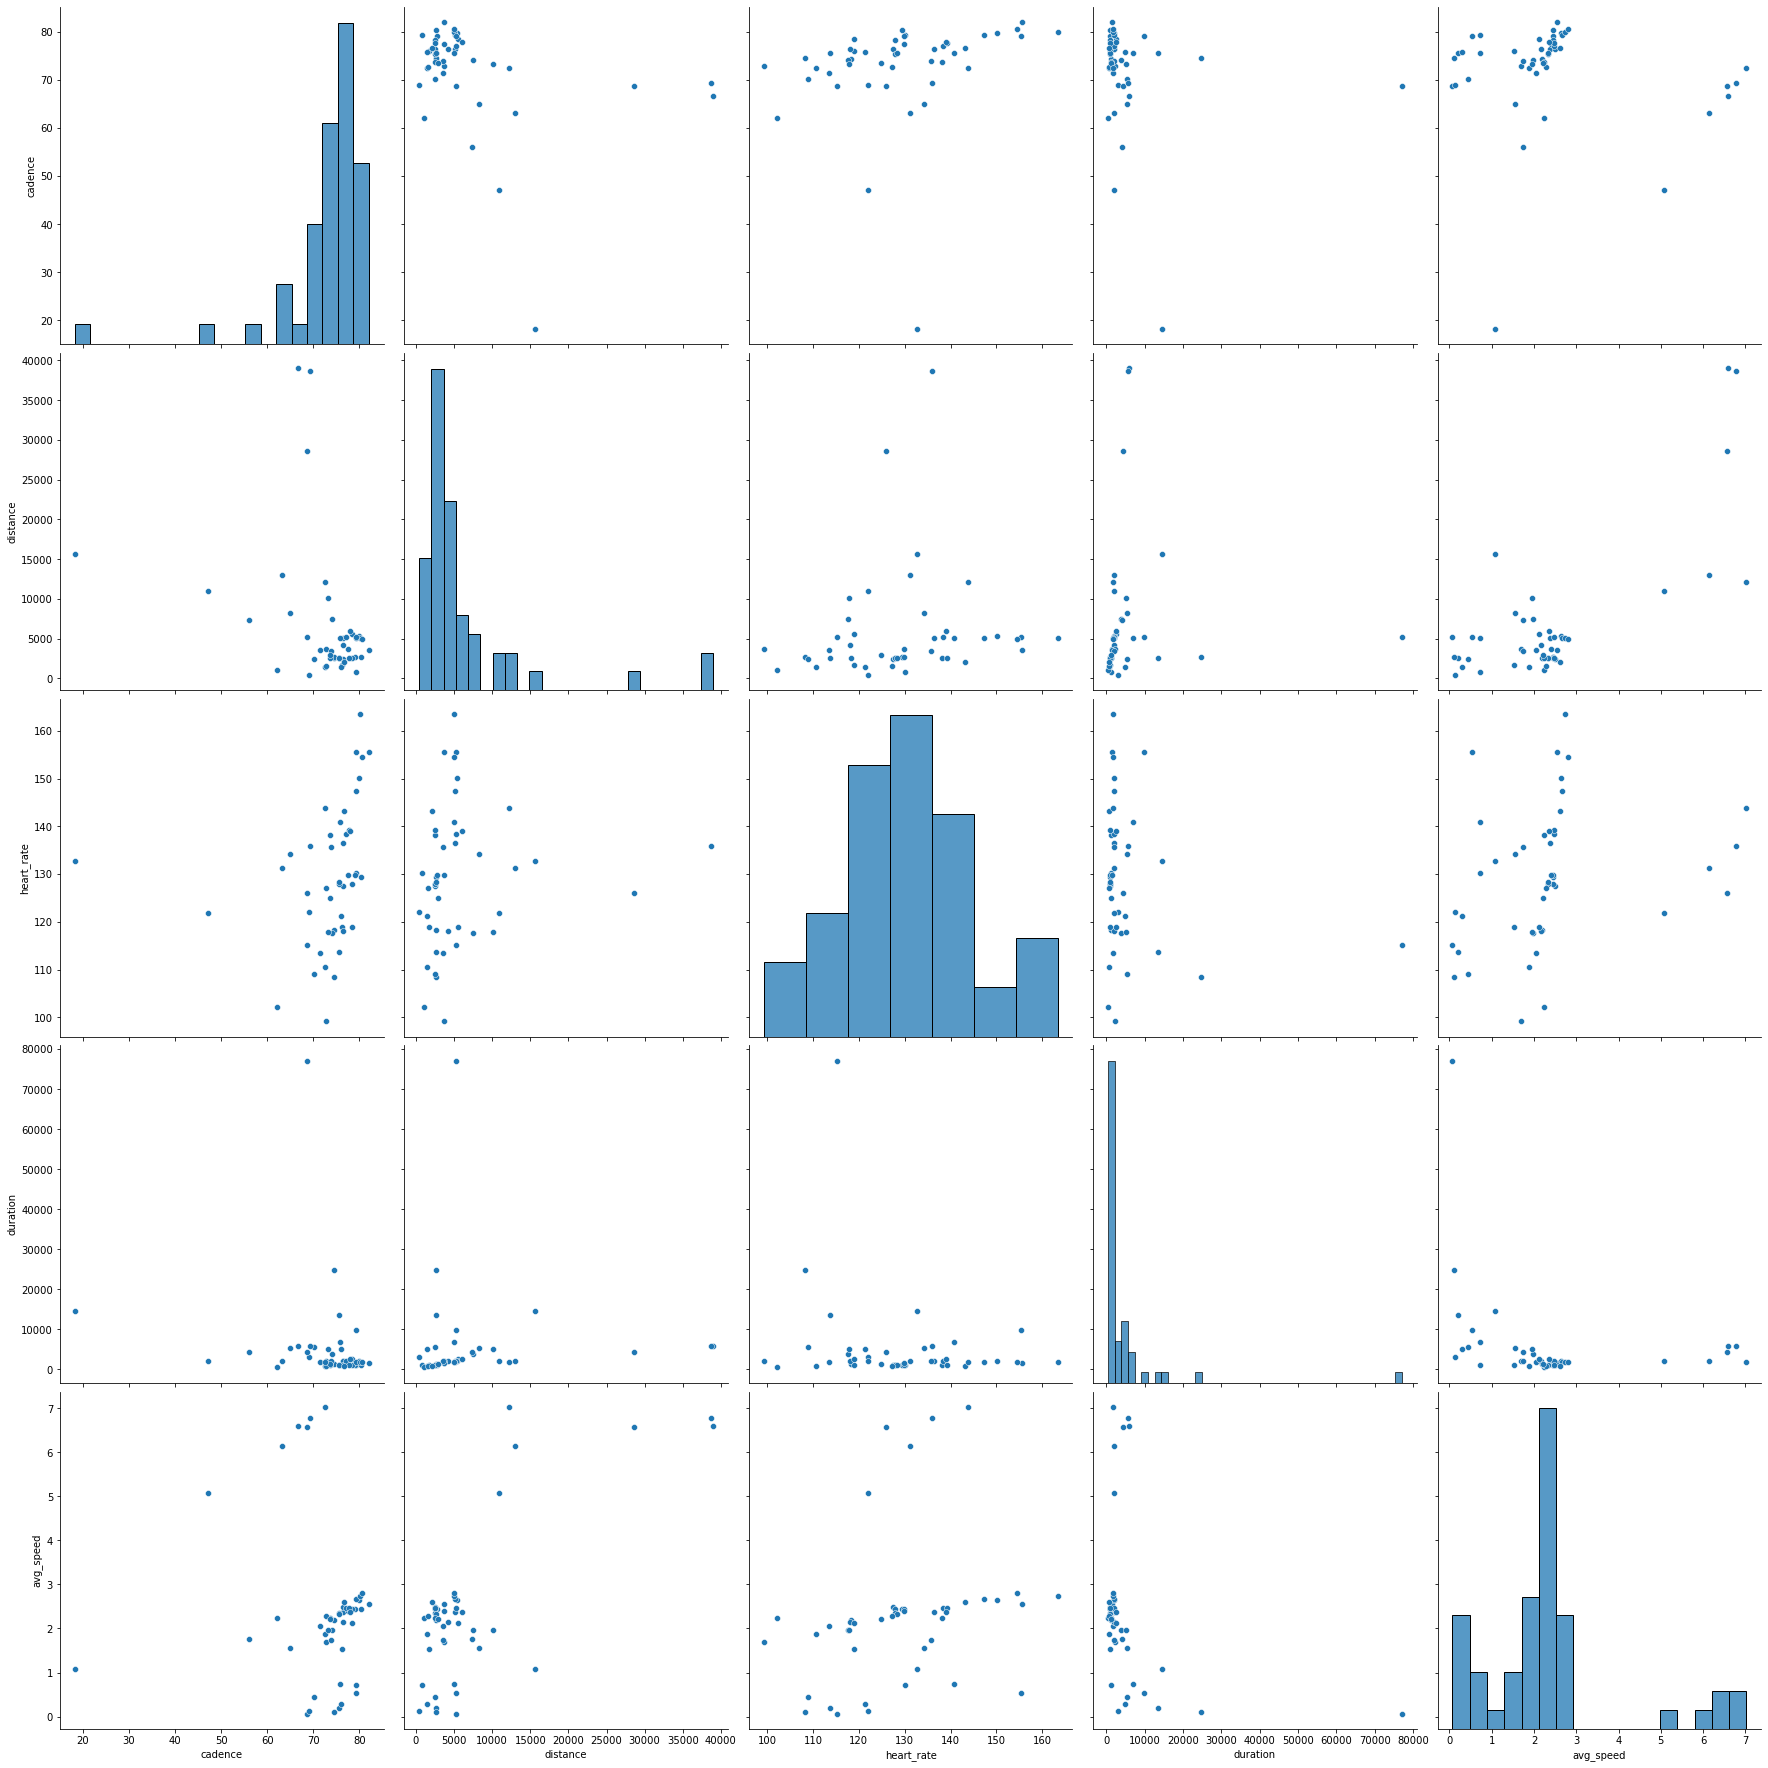

In [11]:
# We are going to plot all the columns against each other and see if there are any interesting relationships or outliers
cols = ['cadence', 'distance', 'heart_rate', 'duration', 'avg_speed']
sns.pairplot(x_vars=cols, y_vars=cols, data=df_days_mean, height=5);

There are some outliers in this dataset. For example, in the scatterplot graph of heart rate vs duration, there are a couple of points that have abnormally high duration values. This could mean that the prof might be taking breaks in-between sessions of his exercise that particular day. We'll try to remove up some of these outliers and see how the data might look.

In [12]:
# find the rows that have abnormal data, implying that the professor has been
# taking too long breaks or there are multiple sessions of exercise in a day
indices = df_days_mean[(df_days_mean['avg_speed'] < 1) | (df_days_mean['duration'] > 10000)].index
df_days_mean.drop(indices, inplace=True)

# convert this distance to km
df_days_mean['distance'] = df_days_mean['distance'] / 1000

# based on some googling, the average speed of jogging is around 3-5 m/s, and cycling around 7 m/s. 
# an assumption can be made that one type of the recorded activity of a particular day is jogging and another is cycling.
# Since Strava is known for tracking running and cycling.
# define jogging vs cycling column types so we can visually see them clearly in the scatterplots
df_days_mean['type'] = df_days_mean['avg_speed'].apply(lambda speed: 'jogging' if speed < 5 else 'cycling')
df_days_mean

,cadence,distance,heart_rate,duration,avg_speed,type
datetime,,,,,,
2019-07-08,74.406504,2.61746,118.337398,1192.0,2.195856,jogging
2019-07-12,74.135016,7.47184,117.687157,3786.0,1.973545,jogging
2019-07-16,76.100000,1.70476,118.858824,1110.0,1.535820,jogging
2019-07-17,76.509972,5.09147,136.424501,2150.0,2.368126,jogging
2019-07-21,80.347985,2.64923,129.340659,1085.0,2.441687,jogging
2019-07-22,79.111111,2.70712,129.774306,1109.0,2.441046,jogging
2019-07-23,77.491477,3.69889,129.789773,1539.0,2.403437,jogging
2019-07-25,72.505882,1.48540,110.631373,788.0,1.885025,jogging
2019-07-26,73.230542,10.08415,117.933005,5134.0,1.964190,jogging


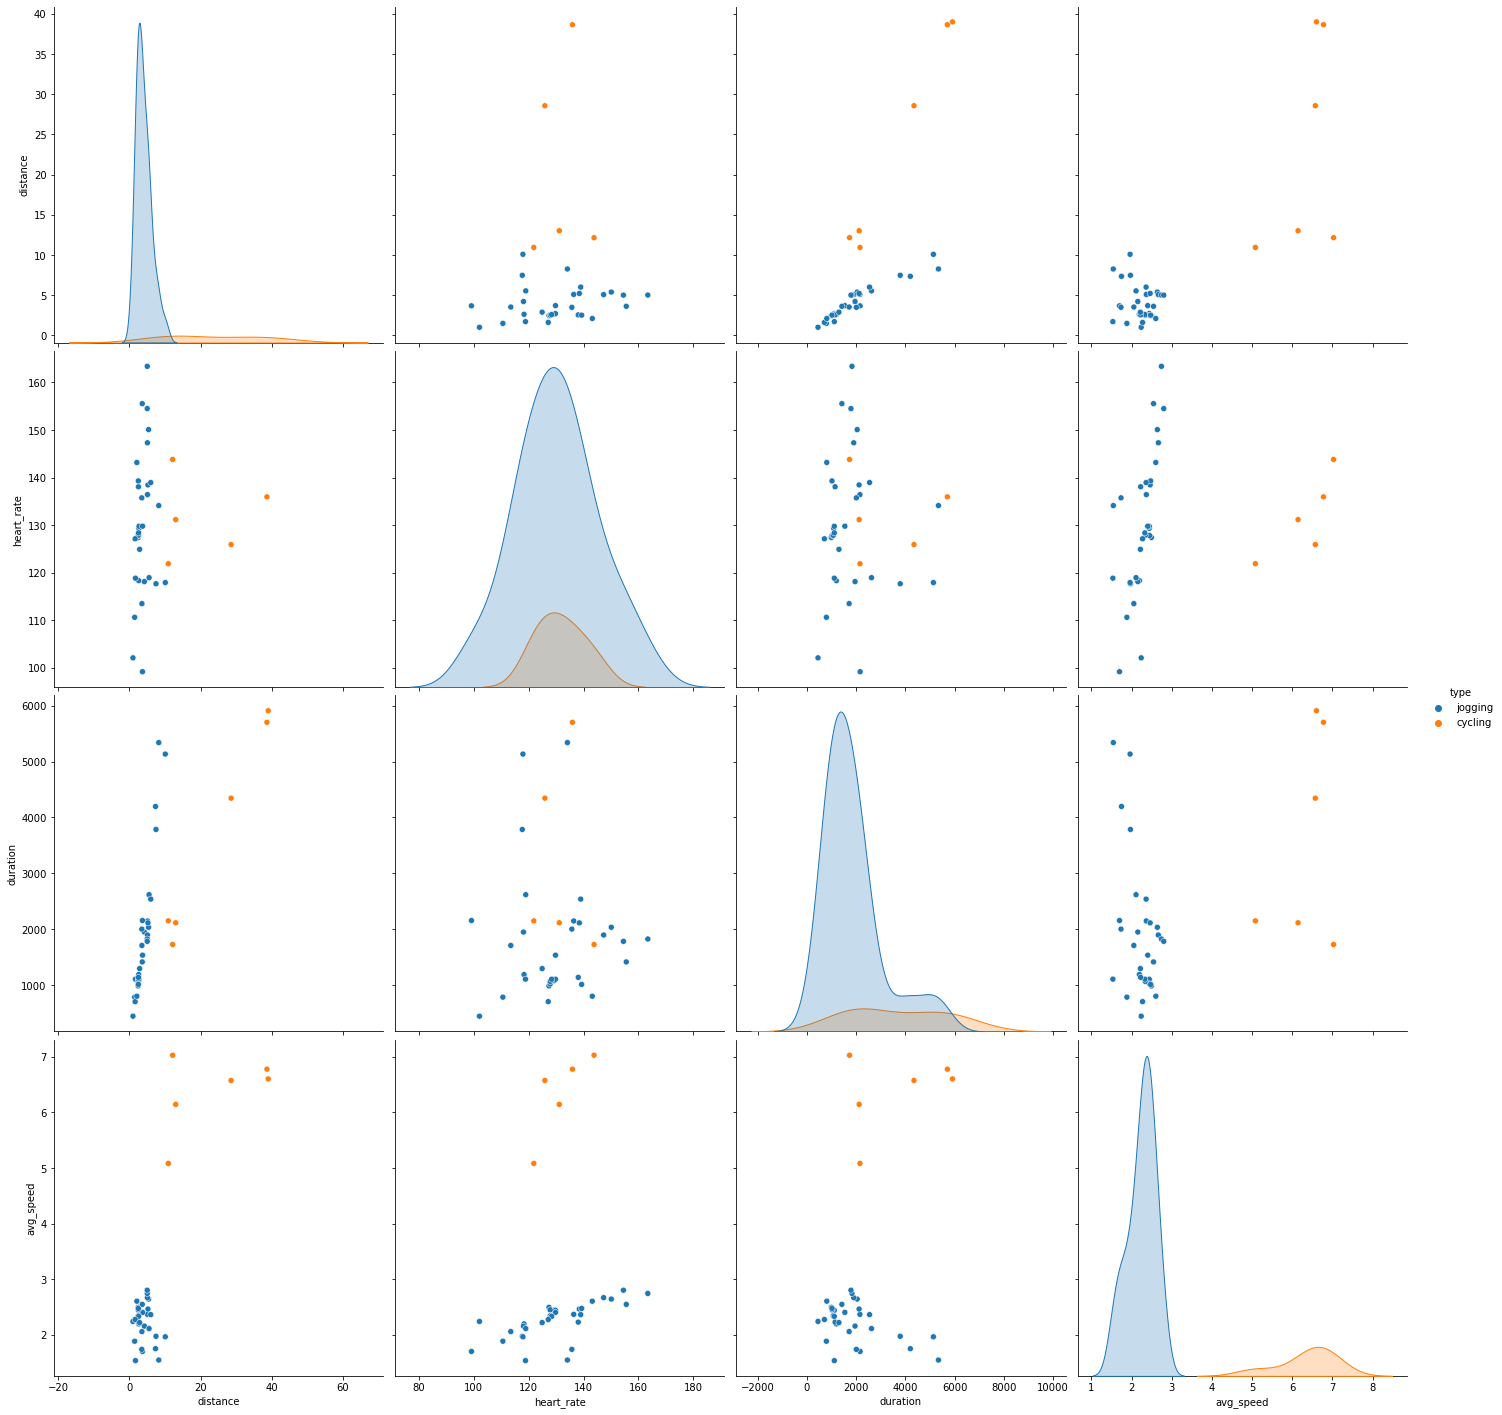

In [13]:
cols = ['distance', 'heart_rate', 'duration', 'avg_speed']
sns.pairplot(x_vars=cols, y_vars=cols, data=df_days_mean, height=5, hue='type');

Interesting takeaway:

From the pair plots above, we can choose what graph makes sense. We can clearly see that there are two types of activities performed, and the data points support this with the different slopes and clusters.

Based on the graph above, we can choose three scatterplots to plot better in more detail below.

[Text(0.5, 1.0, 'Distance vs. Heart Rate'),
 Text(0.5, 0, 'Distance (km)'),
 Text(0, 0.5, 'Average Heart Rate (bpm)')]

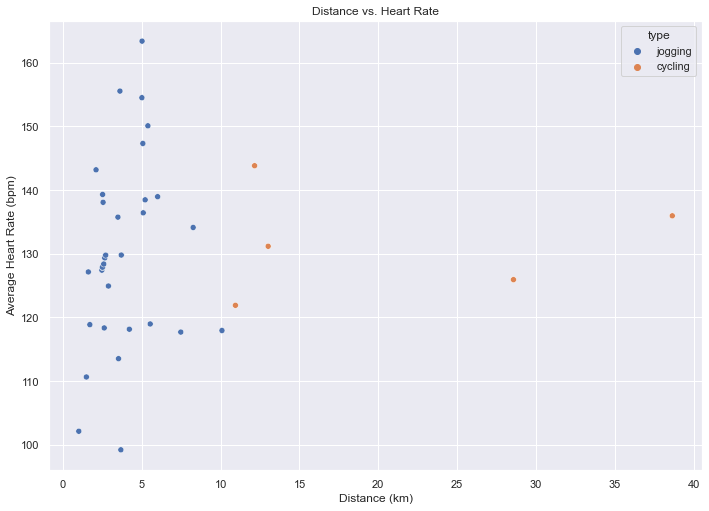

In [14]:
# plot those graph better
sns.set_theme()

# set global figure size
from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7,8.27
sns.scatterplot(data=df_days_mean, x='distance', y='heart_rate', hue='type').set(title='Distance vs. Heart Rate', xlabel='Distance (km)', ylabel='Average Heart Rate (bpm)')

[Text(0.5, 1.0, 'Duration vs. Distance'),
 Text(0.5, 0, 'Duration (seconds)'),
 Text(0, 0.5, 'Distance (km)')]

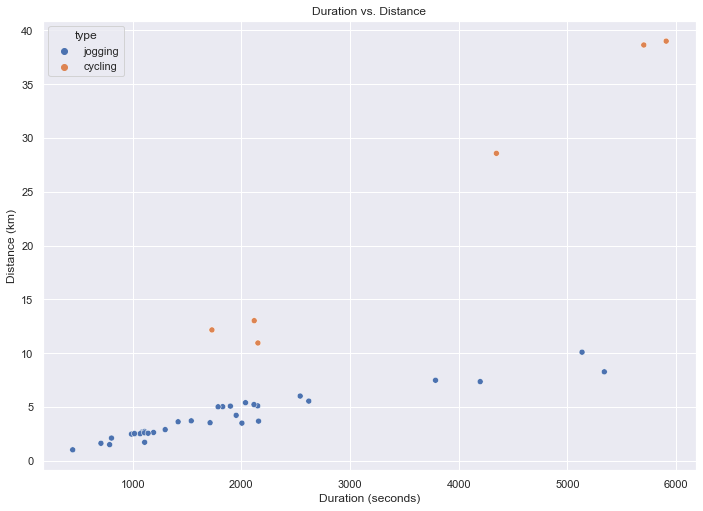

In [15]:
sns.scatterplot(data=df_days_mean, x='duration', y='distance', hue='type').set(title='Duration vs. Distance', xlabel='Duration (seconds)', ylabel='Distance (km)')

[Text(0.5, 1.0, 'Average Speed vs. Heart Rate'),
 Text(0.5, 0, 'Avg Speed (m/s)'),
 Text(0, 0.5, 'Heart Rate (bpm)')]

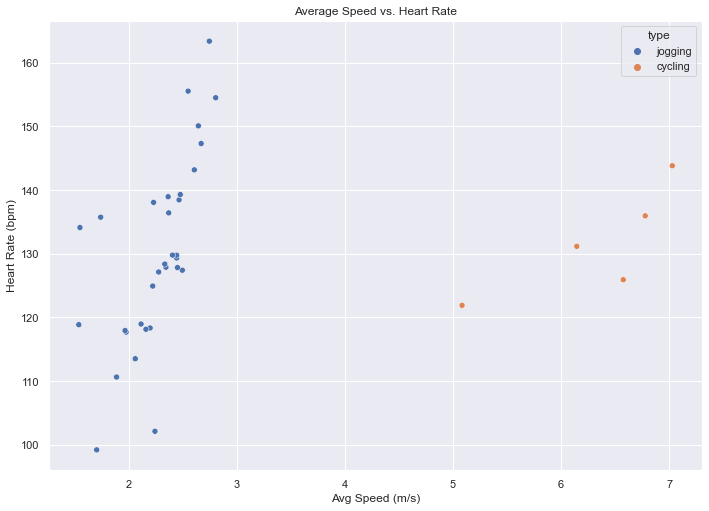

In [16]:
sns.scatterplot(data=df_days_mean, x='avg_speed', y='heart_rate', hue='type').set(title='Average Speed vs. Heart Rate', xlabel='Avg Speed (m/s)', ylabel='Heart Rate (bpm)')

We can clearly see the slope differences in the graphs. In the graph of duration vs distance, we can see that the slopes represent the moving speed of 2 m/s compared to 6 m/s of cycling.
    
1. distance vs heart rate - Most of the time, traveling at a greater distance greatly increases the average heart rate (jogging vs cycling)
2. duration vs distance - expected. the further the duration the further distance travelled. This graph reveals two slopes, one for jogging and one for cycling.
3. avg_speed vs. heart rate - for jogging, a slight increase in speed means greater increase in heart rate. for cycling, the increase in speed means less increase in heart rate.

## Boxplot

Boxplots tell us the five important numbers of a range of data, being the lowest, the lower quartile, the median, the upper quartile, and the maximum. It shows how widespread the data is from the median. We can use a box plot to explore the data and see around what values were his heartrates in his exercise sessions.

In [17]:
df_days_mean['heart_rate'].quantile([.25, .5, .75])

0.25    118.961390
0.50    129.340659
0.75    138.466667
Name: heart_rate, dtype: float64

In [18]:
df_days_mean['heart_rate'].min(), df_days_mean['heart_rate'].max()

(99.187675070028, 163.40175150519977)

[Text(0.5, 1.0, 'Average Heart Rate per Session')]

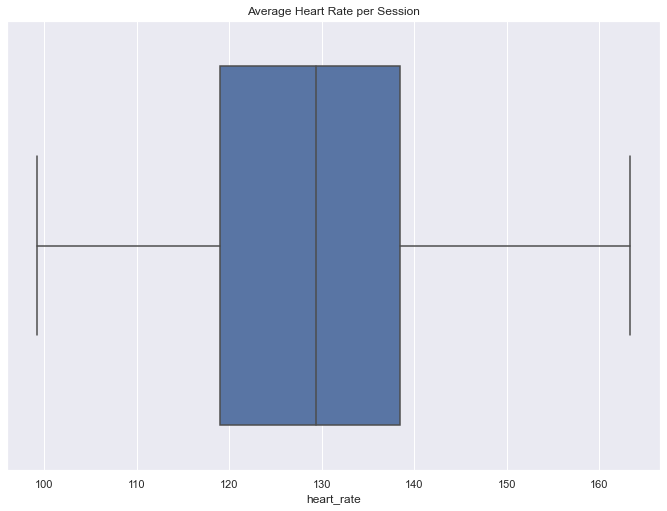

In [19]:
sns.boxplot(x='heart_rate', data=df_days_mean).set(title='Average Heart Rate per Session')

Based on the data above, we can conclude that most of exercise resulted in his heartrates around 130 bpm. The interquartile range from 118 to 138 also is in an acceptable targeted heartrate for jogging and cycling exercise. 

## Line Graph

Line graph is choosen because it can visually tell us the change over time of something and we can easily see the trends of variables at the same time. In this particular context, it would be interesting to know if his exercise habits had changed during those period of 4 months. Has he improved by running at a greater distance ? Has he changed to cycling after a few months of running?

In [20]:
# convert index column to a column
df_days_mean.reset_index(inplace=True)

[Text(0.5, 1.0, 'Change of distance in each day of exercise over time'),
 Text(0, 0.5, 'distance (km)')]

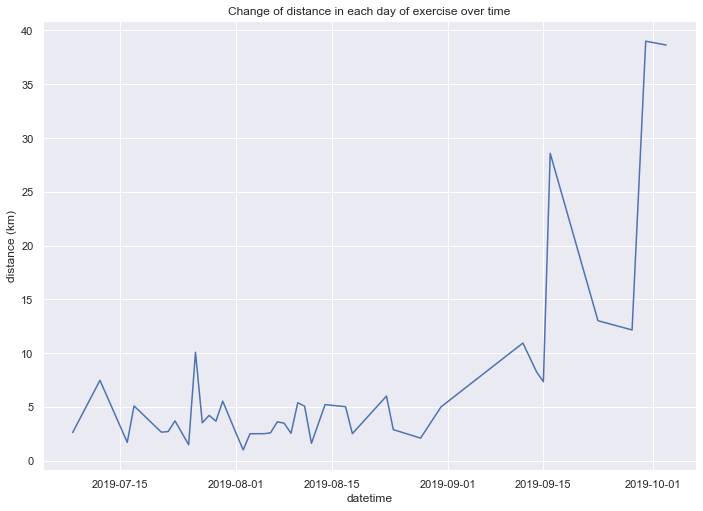

In [21]:
sns.lineplot(data=df_days_mean, x='datetime', y='distance').set(title='Change of distance in each day of exercise over time', ylabel='distance (km)')

Here, we can see that over the first few months, he had been jogging at roughly around the same distance. After September, he changed his routine to cycling, mixed with jogging. The distance increases to roughly 30 km, even 40 km! Not sure if that's an outlier that is supposed to be discarded, because that's a very far distance. It might be that he forgets to untrack his trackers while he's driving. Overall, the picture is pretty clear. He had been jogging, then switched to cycling after a 2-week absense of activity.

## Mapping

To further visualize the dataset, we can plot the locations of his movement in a map. This allows us to see where he might have been jogging/cycling. This can confirm us that he had been jogging and cycling by means of looking at where he had been.

In [22]:
# filter rows that contain the exercise sessions from the active days dataframe
values = []
for i in range(df_days_mean.shape[0]):
    _, _, _, start, end = get_range_info(df, df_days_mean['datetime'][i])
    values.append((start, end))


def get_latlngs_from_time_range(start_time, end_time):
    """Returns a new dataframe that has a timestamp starting from start_time and ends at end_time with only the
    latitude and longitude values"""
    mask = (df['datetime'] <= end_time) & (df['datetime'] >= start_time)
    filtered = df[mask][['datetime', 'position_lat', 'position_long']]
    filtered.columns = ['datetime', 'lat', 'lng']
    filtered.dropna(inplace=True)
    filtered['lat'] = filtered['lat'] * ( 180 / 2**31 )
    filtered['lng'] = filtered['lng'] * ( 180 / 2**31 )
    return filtered

In [23]:
import folium
import random

# generate random colors based on the total days
num_colors = len(values)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_colors)]

m = folium.Map(location=[42.281006,-83.744], zoom_start=12, tiles='Stamen Terrain')

def add_route(m, start_time, end_time, color):
    df_pos = get_latlngs_from_time_range(start_time, end_time)
    folium.PolyLine(locations=zip(df_pos['lat'], df_pos['lng']), weight=5, color=color).add_to(m)

# add the routes to the map
for i in range(len(values)):
    add_route(m, values[i][0], values[i][1], colors[i])

m

## Conclusion

In summary, a few points can be made from all the visualizations so far. It seems that he started his exercise as jogging for around 2 months, then his activity paused and he resumed with cycling. This can be inferred by the scatterplots above, which clearly show two clusters of data, one for jogging and one for cycling. Morever, one plot shows an interesting fact that just by increasing the speed of jogging by a little, can greatly increase the heartrate. If he were to train harder on running, his heartrate could improved and it would be a very good cardio exercise in long term. During his exercise sessions, regardles of jogging or cycling, his heartrate maintains to be around 130 bpm, which is an acceptable, targeted rate. The map above shows us that he had and probaly is still exercising in Ann Arbor. There is an outlier line that stretches from the city to somewhere really far, but other than that, the polylines make sense. He had been jogging/cycling inside the city centre alot, and I think that doing any exercise while inhaling pollution emitted from vehicles may not be the healthiest option. It is advisable to exercise outside of the city zone for best benefits. Overally, I hope that he keeps up the pace and stick to this healthy routine!